In [14]:
import numpy as np
from clustering.kmesar import KMESA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# X, y = make_blobs(n_samples=100000, centers=15, center_box=(-100, 100), cluster_std=4)
X, y = make_blobs(n_samples=1500, centers=10, center_box=(-20, 20))

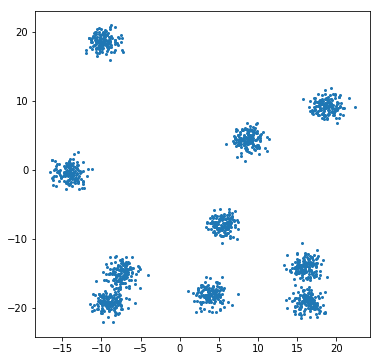

In [25]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=4)
fig.savefig('10_clusters_dataset')

------------- KMESA clustering -------------
    * Iterations before convergence: 73
    * Total empty cluster resolutions: 1
    * Total annealings: 306
    * Sum of squared error:  2.08e+03
    * Time elapsed: 8s 621ms
 ---------------------------------------------
------------- KMESA clustering -------------
    * Iterations before convergence: 76
    * Total empty cluster resolutions: 1
    * Total annealings: 323
    * Sum of squared error:  2.22e+03
    * Time elapsed: 6s 347ms
 ---------------------------------------------
------------- KMESA clustering -------------
    * Iterations before convergence: 150
    * Total empty cluster resolutions: 0
    * Total annealings: 425
    * Sum of squared error:  2.29e+03
    * Time elapsed: 13s 967ms
 ---------------------------------------------
------------- KMESA clustering -------------
    * Iterations before convergence: 162
    * Total empty cluster resolutions: 0
    * Total annealings: 425
    * Sum of squared error:  2.63e+03
 

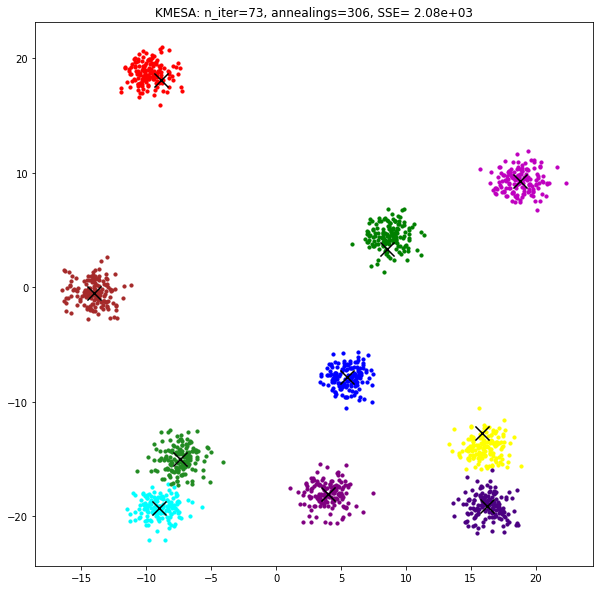

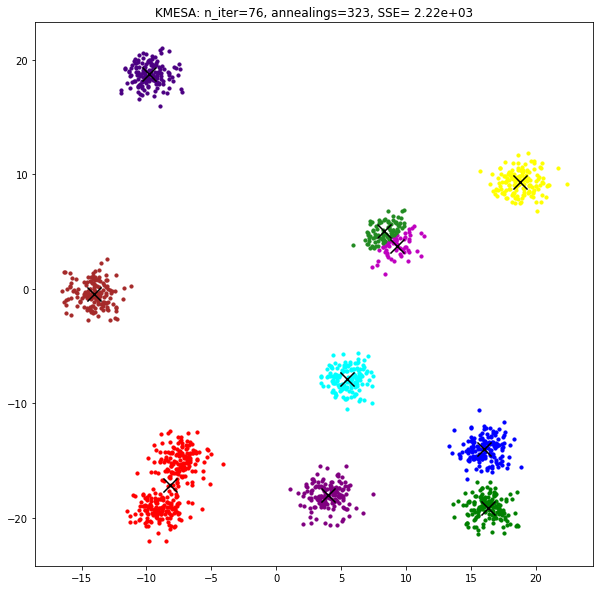

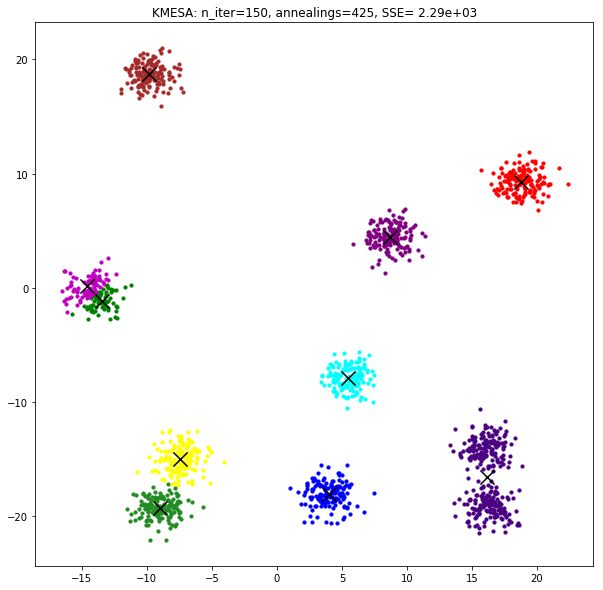

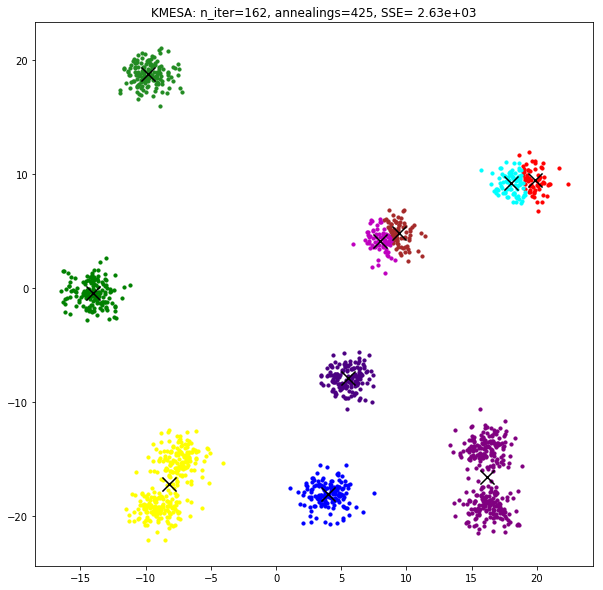

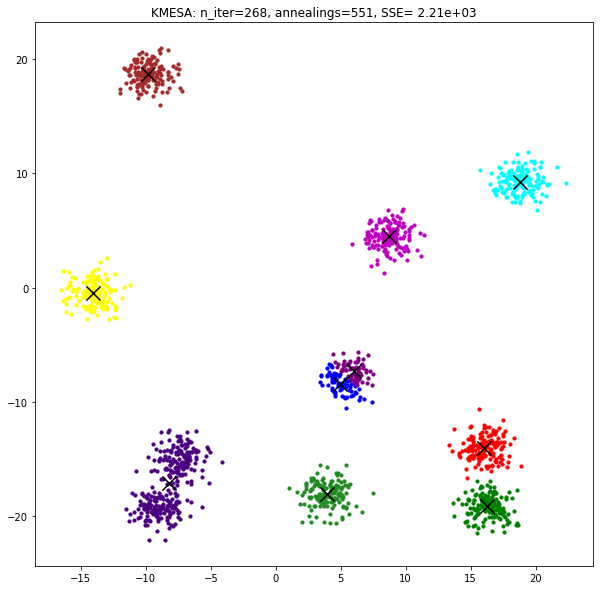

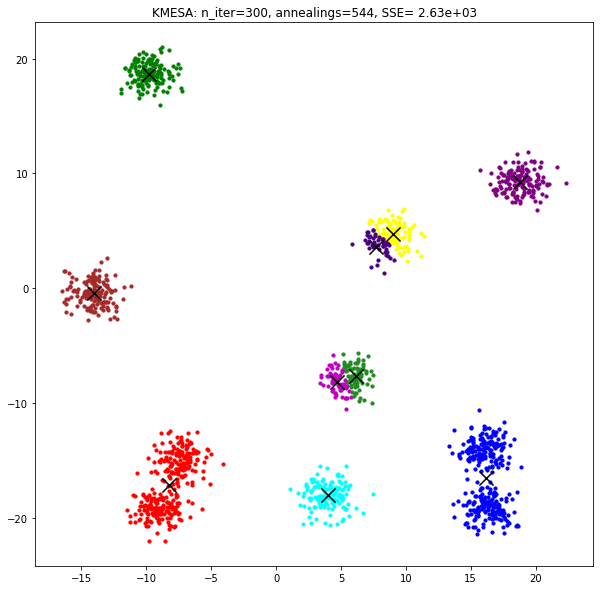

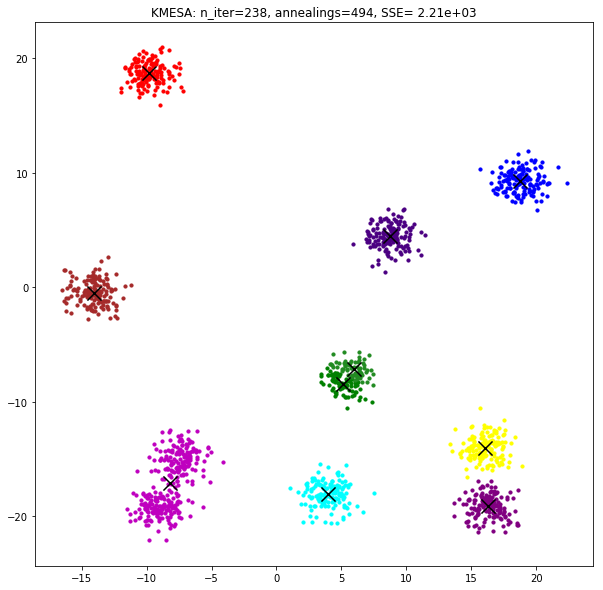

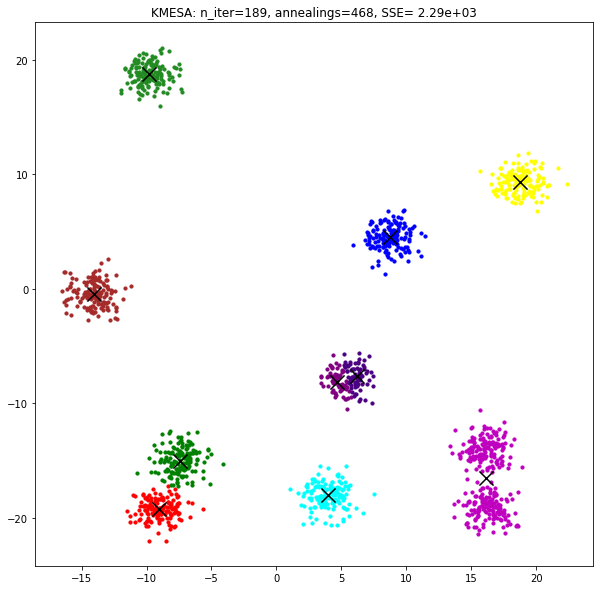

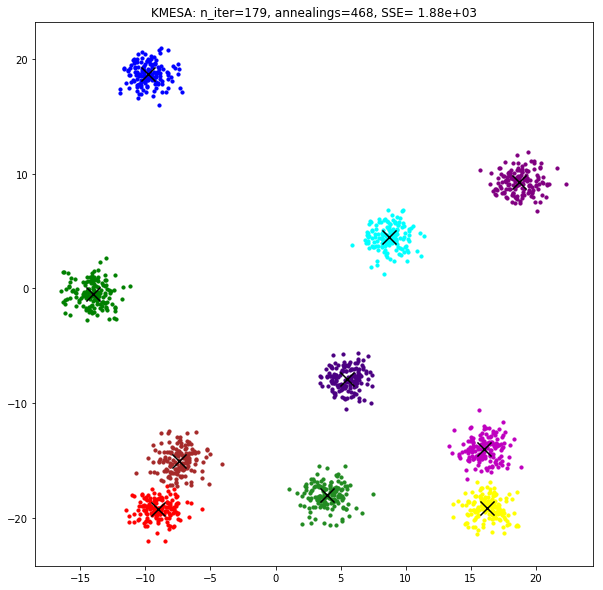

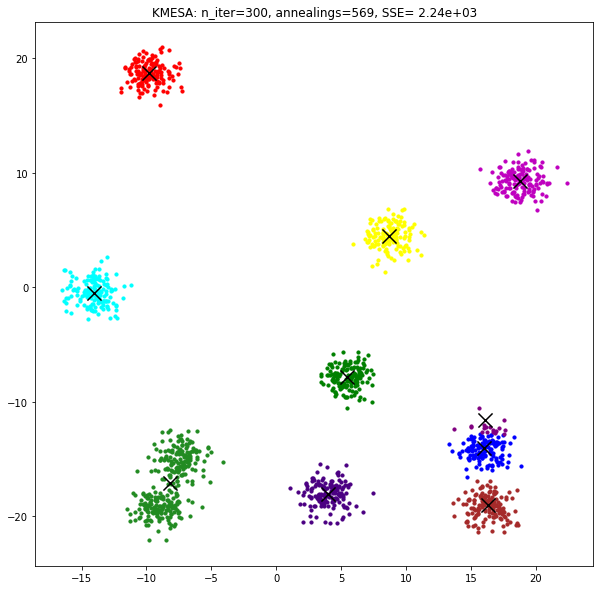

In [24]:
methods = ['max', 'min', 'maxmin', 'cluster_own', 'cluster_other', 'cluster_mean',
           'centroid_split', 'centroid_gather', 'carousel', 'random']
inertias = []

for method in methods:
    est = KMESA(k_clusters=10,
                 init='random',
                 n_init=2,
                 tol=1e-2,
                 annealing_method=method,
                 annealing_prob_function='sigmoid',
                 alpha=20,
                 annealing_weight_function='log',
                 beta=4,
                 convergence_tracking=True,
                 annealing_tracking=True
                 )

    est.fit(X)
    est.print_clustering_info()
    est.plot_clustered_data(X,
                            show_cc_labels=False,
                            out_file=f'KMESA_10_clusters_a_method={method}')
    inertias.append(est.inertia_)

In [20]:
est_sklearn = KMeans(n_clusters=10, n_init=10, init='random')
est_sklearn.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

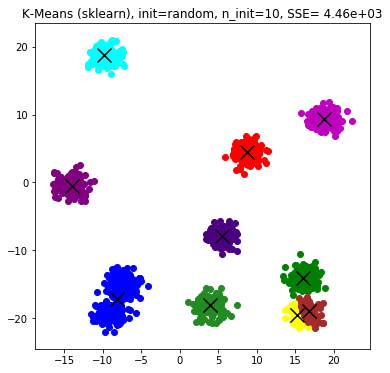

In [23]:
fig = plt.figure(figsize=(6, 6))

colors = est._colors
for label in range(10):
    cluster = X[np.where(est_sklearn.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])

plt.scatter(est_sklearn.cluster_centers_[:, 0],
            est_sklearn.cluster_centers_[:, 1],
            c='black',
            s=200,
            marker='x')

plt.title(f'K-Means (sklearn), init=random, n_init=10, SSE={est_sklearn.inertia_ : .3}')
plt.show()

fig.savefig('K-Means_10_clusters_fail')

In [26]:
print(f'Minimal SSE: {np.min(inertias)}')

Minimal SSE: 1882.058754131319
